In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [70]:
pwd

'/content/drive/MyDrive/Colab Notebooks'

## **Importing and understanding dataset, removing null values**

In [71]:
import warnings
warnings.simplefilter("ignore")         # to remove unnecessary warnings

import pandas as pd                     # to deal with dataframes
import numpy as np                      # to deal with arrays
import seaborn as sns                   # helps with visualization
import matplotlib.pyplot as plt         # to plot graphs
from nltk.sentiment.vader import SentimentIntensityAnalyzer       # for sentiment analysis
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator   # to plot word clouds
import nltk                             # natural language tool kit
import re                               # to handle regular expressions easily
from nltk.corpus import stopwords       # contains stop words - commonly used words that doesnt contribute to actual meaning of a sentence and hence can be ignored
import string                           # strings package

In [72]:
df = pd.read_csv('new_final.csv', encoding="latin-1")      # ISO-8859-1 - single-byte encoding scheme to represent alphabets 
                                                           # that can be represented within the range of 127 to 255

In [73]:
df.head(10)                         # displays first 10 rows of dataframe

,id,tweet,output
0,1.510000e+18,@yesbiker4indy @amanteros @Harri_Est @mfa_russ...,others
1,1.510000e+18,Big question: Russia cut oil/gas to Europe? Ch...,economy
2,1.510000e+18,@Suraj_m_Nirmale @agent1220 @PossieElizabet1 @...,others
3,1.510000e+18,@Jammi_Dodger @AdamBienkov Neither He nor She ...,economy
4,1.510000e+18,@realGonzaloLira Russia has its own interests ...,economy
5,1.510000e+18,@OliverBrowne16 @Reuters Taiwan and Antarctica...,economy
6,1.510000e+18,"@warren__terra Bottom line, unless there's som...",war
7,1.510000e+18,"when I say... poverty, illiteracy, religious r...",economy
8,1.510000e+18,@agent1220 @CryptoMike999 @PossieElizabet1 @RT...,others
9,1.510000e+18,Sakthivel went on to add that the sanctions ac...,sanctions


In [74]:
df.columns                # returns number of columns

Index(['id', 'tweet', 'output'], dtype='object')

In [75]:
df.shape                  # returns shape of dataframe

(870, 3)

In [76]:
df.isnull().sum()         # returns number of rows containing atleast one null value

id        0
tweet     4
output    6
dtype: int64

In [77]:
df = df.dropna()          # removes rows containing null values

df.isnull().sum()

id        0
tweet     0
output    0
dtype: int64

## Extras (not required)

In [ ]:
'''from textblob import TextBlob

data2 = data['tweet']
indices = []
index = 0
for adv in data2:
    x = TextBlob(adv)
    if (x.detect_language() == "en"):
        indices.append(index)
    index+=1

test_en = data2.loc[indices]
print(test_en)'''

In [ ]:
#!pip install langdetect

     |████████████████████████████████| 981 kB 26.2 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=1c8e13c1a2ad8c6e8966fe4d80109ddfa0c6dff152f01369145e791d76039b8e
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [ ]:
'''from langdetect import detect

df = data.copy(deep =False)
df['detect'] = detect(str(df['tweet']))

for i in df.detect:
    if i not in ('en'):
        df.drop(i)

print(len(df))'''

876


## **Data cleaning**

In [78]:
nltk.download('stopwords')        # downloads the stopwords package from nltk library

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [84]:
from nltk.corpus import stopwords

stemmer = nltk.SnowballStemmer("english")       # stemmer - to reduce words to its stem (removes prefix suffix)
stopword = set(stopwords.words('english'))      # set of all stop words in English

print(stemmer)
print(stopword)

{"that'll", 'has', 'on', 'hers', "she's", 'an', 'again', 'hadn', 'your', "should've", 'under', 'how', 'have', 'at', 'to', 'should', "shan't", 'was', 'just', 'so', 'other', 'does', 'more', 'a', 'because', 'did', 'not', "wouldn't", 'over', 'our', 'its', 'if', 'been', "shouldn't", 'nor', "you've", 'between', "you'd", 'do', 'who', 'further', 'after', "mustn't", 'out', 'whom', 'mustn', 'yours', 'are', 'but', 'why', 'once', 'they', 'won', 'ours', 'all', 'it', 'some', "hasn't", 'these', 'had', 'me', 'i', 'be', "weren't", 'myself', 'we', 'off', 'while', 'such', 'from', 'don', 'doesn', 'ain', 'during', 'most', 's', 'too', "won't", 'ourselves', 'here', 'o', 'didn', 'until', 'no', "you're", 'isn', 'needn', 'hasn', 'few', 'having', 'd', 'yourselves', 'theirs', 'into', "aren't", 'am', 'any', "mightn't", 'is', 'haven', 'shan', 'weren', 'before', 'being', 'through', 'by', 'down', 'itself', 'aren', 'him', "doesn't", 'he', 'mightn', 'below', 'or', 'couldn', 'now', 'in', 'wasn', 'shouldn', 'there', 'tha

In [80]:
df.head()

,id,tweet,output
0,1.510000e+18,@yesbiker4indy @amanteros @Harri_Est @mfa_russ...,others
1,1.510000e+18,Big question: Russia cut oil/gas to Europe? Ch...,economy
2,1.510000e+18,@Suraj_m_Nirmale @agent1220 @PossieElizabet1 @...,others
3,1.510000e+18,@Jammi_Dodger @AdamBienkov Neither He nor She ...,economy
4,1.510000e+18,@realGonzaloLira Russia has its own interests ...,economy


In [86]:
# pre process the data
# remove all the links, punctuation, symbols and other language errors from the tweets

def clean(text):
    text = str(text).lower()                                          # convert to lowercase
    text = re.sub('\[.*?\]', '', text)                                # remove punctuations
    text = re.sub('@[^\s]+', '', text)                                # removes usernames
    #text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)                  # remove links
    text = re.sub('<.*?>+', '', text)                                 # remove < >
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)   # remove white spaces
    text = re.sub('\n', '', text)                                     # remove new lines
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword] # remove stop words
    text = " ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]           # covert words to its stems
    text = " ".join(text)
    return text

In [87]:
df['tweet'] = df['tweet'].apply(clean)                    # applying the clean function on each row of dataframe iteratively

In [88]:
df.head(10)

,id,tweet,output
0,1.510000e+18,vagu stupid,others
1,1.510000e+18,big question russia cut oilga europ china buy ...,economy
2,1.510000e+18,tell us russiaindia social cultur exchang,others
3,1.510000e+18,neither busi ah father indian citizen own sh...,economy
4,1.510000e+18,russia interest prolong war extract energi s...,economy
5,1.510000e+18,taiwan antarctica yet come russia china indi...,economy
6,1.510000e+18,bottom line unless there sort intern unanim i...,war
7,1.510000e+18,say poverti illiteraci religi rage profound in...,economy
8,1.510000e+18,lol india russia relationship beyond west...,others
9,1.510000e+18,sakthivel went add sanction actual allow india...,sanctions


## **Word Clouds**

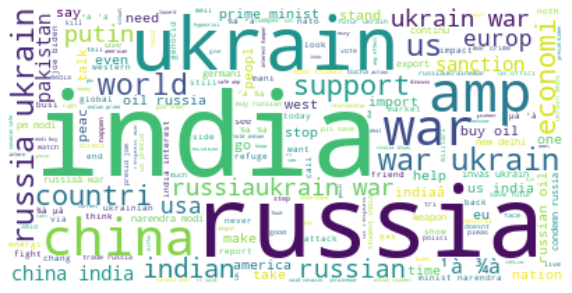

In [89]:
# wordcloud of the tweets
# shows the most frequently used words in the tweets by people who share their feelings and updates about the Ukraine and Russia war

text = " ".join(i for i in df.tweet)                  # combines every tweet into one string
stopwords = set(STOPWORDS)                            # set of stop words
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure(figsize=(10,10))                           # size of the plot
plt.imshow(wordcloud, interpolation='bilinear')       # imshow - display data as image, bilinear interpolation - interpolate functions using 2 variables
plt.axis("off")                                       # hides axes
plt.show()

In [90]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [91]:
# add three more columns in this dataset as Positive, Negative and Neutral by calculating the sentiment scores of the tweets

sentiments = SentimentIntensityAnalyzer()
df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df["tweet"]]
df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["tweet"]]
df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df["tweet"]]
data = df[["tweet","Positive","Negative","Neutral"]]
data.head()

,tweet,Positive,Negative,Neutral
0,vagu stupid,0.000,0.773,0.227
1,big question russia cut oilga europ china buy ...,0.245,0.069,0.686
2,tell us russiaindia social cultur exchang,0.000,0.000,1.000
3,neither busi ah father indian citizen own sh...,0.115,0.000,0.885
4,russia interest prolong war extract energi s...,0.126,0.163,0.711


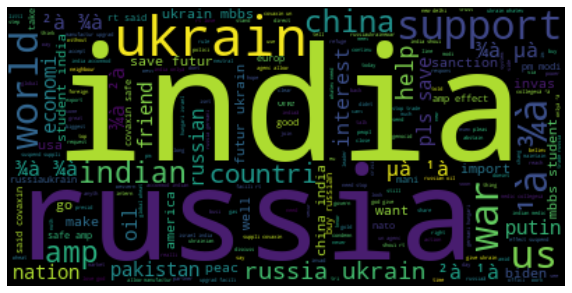

In [92]:
# most frequent words used by people with positive sentiments

positive = ' '.join([i for i in data['tweet'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(positive)
plt.figure( figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

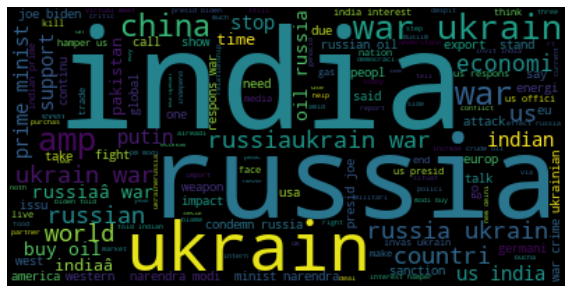

In [93]:
# most frequent words used by people with negative sentiments

negative =' '.join([i for i in data['tweet'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(negative)
plt.figure( figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Another method to analyze sentiments (extra)

In [ ]:
# another way to analyze sentiments

def analyze_sentiment(tweet):
        analysis = TextBlob(tweet)
        
        if analysis.sentiment.polarity > 0:
            return 1
        elif analysis.sentiment.polarity == 0:
            return 0
        else:
            return -1

In [ ]:
# continuation ...
from textblob import TextBlob

data['sentiment'] = np.array([analyze_sentiment(tweet) for tweet in data['tweet']])

data.head()

,tweet,Positive,Negative,Neutral,sentiment
0,vagu stupid,0.000,0.773,0.227,-1
1,big question russia cut oilga europ china buy ...,0.245,0.069,0.686,0
2,tell us russiaindia social cultur exchang,0.000,0.000,1.000,1
3,neither busi ah father indian citizen own sh...,0.115,0.000,0.885,1
4,russia interest prolong war extract energi s...,0.126,0.163,0.711,0


In [ ]:
# extracting the most popular 30 words and prints its count in a frequency table

import collections

texts = [" ".join([text for text in data.tweet]) for tweet in data]
#print(texts)
final_tweet = str(texts)
#final_tweet = " ".join(texts)

filtered_words = [word for word in final_tweet.split() if word not in stopwords]
counted_words = collections.Counter(filtered_words)

word_count = {}

for letter, count in counted_words.most_common(10):
    word_count[letter] = count
    
for i,j in word_count.items():
        print('Word: {0}, count: {1}'.format(i,j))


Word: india, count: 3120
Word: russia, count: 2432
Word: ukrain, count: 2172
Word: war, count: 1524
Word: us, count: 856
Word: amp, count: 572
Word: indian, count: 540
Word: china, count: 536
Word: russian, count: 484
Word: oil, count: 468


In [ ]:
df.head()

,id,tweet,output,Positive,Negative,Neutral
0,1.510000e+18,vagu stupid,others,0.000,0.773,0.227
1,1.510000e+18,big question russia cut oilga europ china buy ...,economy,0.245,0.069,0.686
2,1.510000e+18,tell us russiaindia social cultur exchang,others,0.000,0.000,1.000
3,1.510000e+18,neither busi ah father indian citizen own sh...,economy,0.115,0.000,0.885
4,1.510000e+18,russia interest prolong war extract energi s...,economy,0.126,0.163,0.711


## **Method 1 - Using Count Vectorizer and TfIdf**

In [96]:
def text_cleaning(a):
  remove_punctuation = [char for char in a if char not in string.punctuation]
  remove_punctuation=''.join(remove_punctuation) 
  return [word for word in remove_punctuation.split() if word.lower() not in stopword]

In [97]:
df.iloc[:,1].apply(text_cleaning)

0                                         [vagu, stupid]
1      [big, question, russia, cut, oilga, europ, chi...
2       [tell, us, russiaindia, social, cultur, exchang]
3      [neither, busi, ah, father, indian, citizen, s...
4      [russia, interest, prolong, war, extract, ener...
                             ...                        
861    [pls, save, futur, ukrain, mbbs, student, indi...
862    [india, council, technic, educ, aict, ask, tec...
863    [screen, student, return, india, ukrain, scree...
864    [pls, save, futur, ukrain, mbbs, student, indi...
865    [screen, student, return, india, ukrain, scree...
Name: tweet, Length: 864, dtype: object

In [98]:
# assigns each distinct word in each tweet a unique number (vectorizing the words)

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer=text_cleaning).fit(df['tweet'])   # fitting the data
  
#print(len(vectorizer.vocabulary_))   
print(vectorizer.vocabulary_)

{'vagu': 3177, 'stupid': 2845, 'big': 320, 'question': 2325, 'russia': 2502, 'cut': 701, 'oilga': 2032, 'europ': 986, 'china': 496, 'buy': 424, 'india': 1432, 'prepar': 2248, 'ksauae': 1605, 'want': 3240, 'talk': 2904, 'nobodi': 1989, 'respect': 2446, 'biden': 316, 'traitor': 3016, 'know': 1599, 'â\x80\x9cintern': 3471, 'communiti': 572, 'see': 2609, 'gettr': 1215, 'tell': 2924, 'us': 3160, 'russiaindia': 2514, 'social': 2727, 'cultur': 694, 'exchang': 1011, 'neither': 1955, 'busi': 419, 'ah': 69, 'father': 1073, 'indian': 1440, 'citizen': 521, 'share': 2646, 'infosi': 1475, 'mani': 1744, 'countri': 647, 'let': 1654, 'sink': 2700, 'thick': 2949, 'nut': 2015, 'interest': 1502, 'prolong': 2286, 'war': 3241, 'extract': 1041, 'energi': 948, 'starv': 2802, 'western': 3295, 'build': 406, 'parallel': 2110, 'economi': 911, 'allianc': 85, 'north': 2000, 'korea': 1603, 'iran': 1521, 'name': 1919, 'taiwan': 2896, 'antarctica': 135, 'yet': 3381, 'come': 560, 'trade': 3011, 'gold': 1234, 'back': 24

In [99]:
vector = vectorizer.transform(df['tweet'])          # transforming the fit data

print(vector)

  (0, 2845)	1
  (0, 3177)	1
  (1, 316)	1
  (1, 320)	1
  (1, 424)	1
  (1, 496)	1
  (1, 572)	1
  (1, 701)	1
  (1, 986)	1
  (1, 1215)	1
  (1, 1432)	1
  (1, 1599)	1
  (1, 1605)	1
  (1, 1989)	2
  (1, 2032)	1
  (1, 2248)	1
  (1, 2325)	1
  (1, 2446)	2
  (1, 2502)	2
  (1, 2609)	1
  (1, 2904)	1
  (1, 3016)	1
  (1, 3240)	1
  (1, 3471)	1
  (2, 694)	1
  :	:
  (862, 1771)	1
  (862, 2048)	1
  (862, 2186)	1
  (862, 2578)	1
  (862, 2842)	1
  (862, 3072)	1
  (863, 288)	1
  (863, 763)	1
  (863, 829)	1
  (863, 1432)	1
  (863, 1966)	1
  (863, 2210)	1
  (863, 2288)	1
  (863, 2342)	1
  (863, 2455)	1
  (863, 2526)	1
  (863, 2585)	1
  (863, 2598)	2
  (863, 2696)	1
  (863, 2805)	1
  (863, 2842)	1
  (863, 3072)	1
  (863, 3182)	1
  (863, 3251)	1
  (863, 3286)	1


In [103]:
# TF-IDF Algorithm -> term frequency-inverse document frequency -> to know the most significant words
# to know which word is most important in each tweet and assigning a probability (tfidf value) to that word, and based on that word, the tweet will be classified

from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer().fit(vector)
#print(tfidf_transformer)

tweet_tfidf=tfidf_transformer.transform(vector)
print("The transformed values:")
print(tweet_tfidf)                          # got tfidf values for whole vocabulary
print("\nShape :",tweet_tfidf.shape)        #(864, 3557) - 864 rows and 3557 different vocabulary/words in each row

The transformed values:
  (0, 3177)	0.7425723812478019
  (0, 2845)	0.6697658237085327
  (1, 3471)	0.23769463269094954
  (1, 3240)	0.14896382319556337
  (1, 3016)	0.23769463269094954
  (1, 2904)	0.146644133786868
  (1, 2609)	0.154146702116701
  (1, 2502)	0.10159444366649806
  (1, 2446)	0.4015138276631499
  (1, 2325)	0.18712430082963735
  (1, 2248)	0.21438952683351256
  (1, 2032)	0.22406201968901193
  (1, 1989)	0.44812403937802386
  (1, 1605)	0.23769463269094954
  (1, 1599)	0.16994923964430497
  (1, 1432)	0.04380379321311263
  (1, 1215)	0.23769463269094954
  (1, 986)	0.13301152078493042
  (1, 701)	0.19557403491043732
  (1, 572)	0.21438952683351256
  (1, 496)	0.09975489839057301
  (1, 424)	0.11720898325732643
  (1, 320)	0.18358185264624258
  (1, 316)	0.11366653507393165
  (2, 3160)	0.19066029085473357
  :	:
  (862, 2578)	0.3973279102649286
  (862, 2186)	0.40128444681922637
  (862, 2048)	0.49472163981655415
  (862, 1771)	0.40128444681922637
  (862, 1432)	0.11080552905962372
  (862, 1181)	0

In [105]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB().fit(tweet_tfidf,df['output'])

In [42]:
all_predictions = model.predict(tweet_tfidf)        # predicting the output
print(all_predictions)

['war' 'economy' 'war' 'economy' 'economy' 'economy' 'war' 'economy' 'war'
 'sanctions' 'war' 'sanctions' 'economy' 'economy' 'economy' 'economy'
 'sanctions' 'war' 'sanctions' 'war' 'economy' 'war' 'war' 'sanctions'
 'war' 'sanctions' 'war' 'sanctions' 'war' 'war' 'sanctions' 'war' 'war'
 'war' 'war' 'sanctions' 'war' 'war' 'economy' 'sanctions' 'war' 'war'
 'others' 'war' 'war' 'sanctions' 'sanctions' 'war' 'economy' 'economy'
 'war' 'war' 'economy' 'war' 'war' 'war' 'others' 'war' 'economy' 'others'
 'war' 'war' 'war' 'war' 'war' 'war' 'war' 'economy' 'war' 'economy' 'war'
 'economy' 'war' 'sanctions' 'economy' 'war' 'economy' 'war' 'economy'
 'war' 'war' 'war' 'economy' 'sanctions' 'sanctions' 'war' 'economy' 'war'
 'war' 'economy' 'war' 'economy' 'war' 'economy' 'economy' 'others' 'war'
 'war' 'sanctions' 'economy' 'economy' 'war' 'war' 'others' 'economy'
 'war' 'others' 'others' 'sanctions' 'sanctions' 'others' 'economy'
 'economy' 'war' 'war' 'economy' 'others' 'sanctions' 'sanc

In [107]:
# Printing the confusion matrix of our prediction
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(df['output'], all_predictions)   # shows how many samples are correctly classified and how many are not
print(mat)

[[149   0   0  22   0  13]
 [  2  42   0  16   0  50]
 [  0   0   0   7   0  16]
 [  1   0   0 220   0   7]
 [  0   1   0   4  33  19]
 [  2   0   0   8   0 252]]


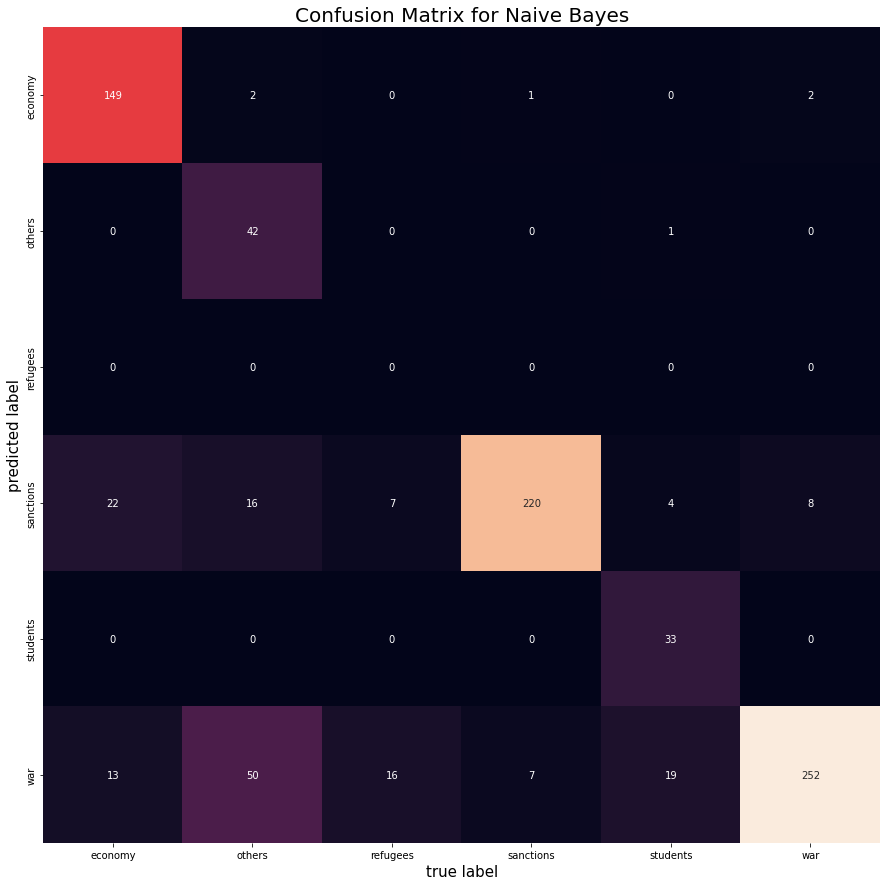

In [113]:
from sklearn.metrics import confusion_matrix

#            0         1         2            3            4        5
ticks = ["economy", "others", "refugees", "sanctions", "students", "war"]

plt.figure(figsize=(15,15))
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)
#print(mat.T)
plt.xticks(np.arange(len(ticks))+0.5, ticks)
plt.yticks(np.arange(len(ticks))+0.5, ticks)
plt.title('Confusion Matrix for Naive Bayes', size=20)
plt.xlabel('true label', size=15)
plt.ylabel('predicted label', size=15)
plt.show()

In [117]:
from sklearn.metrics import accuracy_score

print(r"Accuracy = %.2f" % accuracy_score(df['output'], all_predictions))
print("Number of correctly classified samples = ",accuracy_score(df['output'], all_predictions, normalize=False))


Accuracy = 0.81
Number of correctly classified samples =  696


## **Method 2 - Using CountVectorizer only** 

In [49]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(ngram_range=(1,2))    # Unigram and Bigram
final_vectorized_data = count_vectorizer.fit_transform(df['tweet'])  
final_vectorized_data

<864x13623 sparse matrix of type '<class 'numpy.int64'>'
	with 31151 stored elements in Compressed Sparse Row format>

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(final_vectorized_data, df['output'], test_size=0.3, random_state=2) 

In [61]:
print("X_train_shape : ",X_train.shape)
print("X_test_shape : ",X_test.shape)
print("y_train_shape : ",y_train.shape)
print("y_test_shape : ",y_test.shape)

X_train_shape :  (604, 13623)
X_test_shape :  (260, 13623)
y_train_shape :  (604,)
y_test_shape :  (260,)


In [62]:
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes Classifier

model_naive = MultinomialNB().fit(X_train, y_train) 
predicted_naive = model_naive.predict(X_test)
predicted_naive

array(['economy', 'sanctions', 'sanctions', 'sanctions', 'economy',
       'sanctions', 'sanctions', 'sanctions', 'sanctions', 'sanctions',
       'war', 'economy', 'others', 'sanctions', 'economy', 'sanctions',
       'sanctions', 'war', 'sanctions', 'sanctions', 'sanctions', 'war',
       'war', 'sanctions', 'sanctions', 'economy', 'sanctions', 'economy',
       'economy', 'sanctions', 'sanctions', 'sanctions', 'war',
       'sanctions', 'war', 'war', 'war', 'economy', 'students',
       'sanctions', 'sanctions', 'students', 'sanctions', 'economy',
       'war', 'war', 'war', 'students', 'economy', 'sanctions', 'war',
       'sanctions', 'students', 'war', 'sanctions', 'economy', 'war',
       'sanctions', 'economy', 'sanctions', 'sanctions', 'sanctions',
       'war', 'economy', 'sanctions', 'war', 'war', 'economy',
       'sanctions', 'sanctions', 'war', 'sanctions', 'economy', 'others',
       'war', 'economy', 'war', 'economy', 'war', 'war', 'sanctions',
       'economy', 'war', 

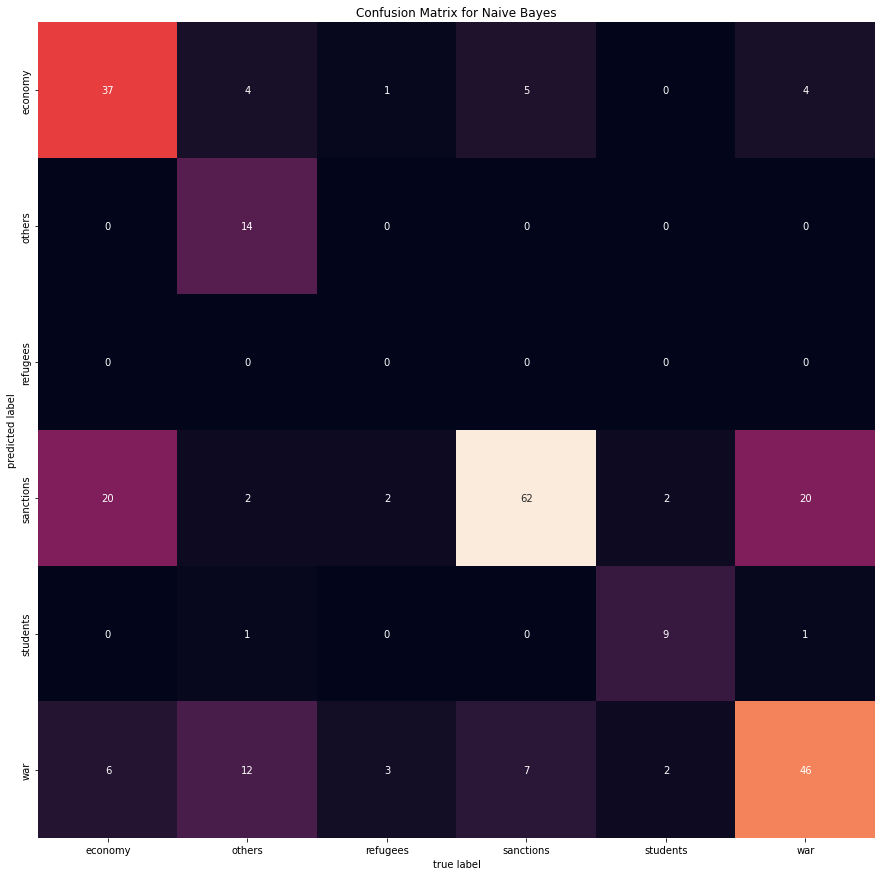

In [63]:
from sklearn.metrics import confusion_matrix

ticks = ["economy", "others", "refugees", "sanctions", "students", "war"]

plt.figure(figsize=(15,15))
mat = confusion_matrix(y_test, predicted_naive)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)
#print(mat.T)
plt.xticks(np.arange(len(ticks))+0.5, ticks)
plt.yticks(np.arange(len(ticks))+0.5, ticks)
plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

In [66]:
from sklearn.metrics import accuracy_score

print("Accuracy with Naive-bayes: ",accuracy_score(predicted_naive, y_test))
print("Number of correctly classified samples: ",accuracy_score(predicted_naive, y_test, normalize=False))

Accuracy with Naive-bayes:  0.6461538461538462
Number of correctly classified samples:  168


In [67]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predicted_naive))

              precision    recall  f1-score   support

     economy       0.73      0.59      0.65        63
      others       1.00      0.42      0.60        33
    refugees       0.00      0.00      0.00         6
   sanctions       0.57      0.84      0.68        74
    students       0.82      0.69      0.75        13
         war       0.61      0.65      0.63        71

    accuracy                           0.65       260
   macro avg       0.62      0.53      0.55       260
weighted avg       0.67      0.65      0.64       260

